# LRD IR spectrum

## Preparation

In [1]:
import numpy as np
from scipy import integrate, optimize
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const

from LRD_IR_spectrum import *

u.set_enabled_equivalencies(u.spectral())  # enable convenient equivalencies for converting between nu, lambda

In [2]:
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)  # suppress warnings from integration

In [3]:
Orion_opacity = OpacityData('data/Orion.opc')
Temple_SED = IncidentSED('data/Temple.template')

## Check Luminosity

In [4]:
# please make sure the total energy of incident SED is as same as the parameter you input in the following line
# Here I use L_UV = 1e46 erg/s
# This Luminosity is set in Class IncidentSED

utils.trapz_log(Temple_SED.L_nu,Temple_SED.wavelength.to(u.Hz).value)

1.0047978691562582e+46

## Create Model

In [5]:
# n_0: cm^-3 gas density, gamma: dimensionless power law index , L_UV: erg/s, the incident total energy, T_sub: K, sublimation temperature, NH_target: cm^-2, column density we want to satisfy A_V, opacity: OpacityData, incident_SED: IncidentSED
model = OrionLRDModel(n_0=100, gamma=0.,L_UV=1e46, T_sub=1500, NH_target=7.5e22, opacity=Orion_opacity, incident_SED=Temple_SED)

## Calculate SED

In [6]:
Rest_frame_wavelength = np.geomspace(0.01,1e6,10000)*u.micron
L_nu = model.calc_L_nu_photon(Rest_frame_wavelength.to(u.Hz))

## Make Plot

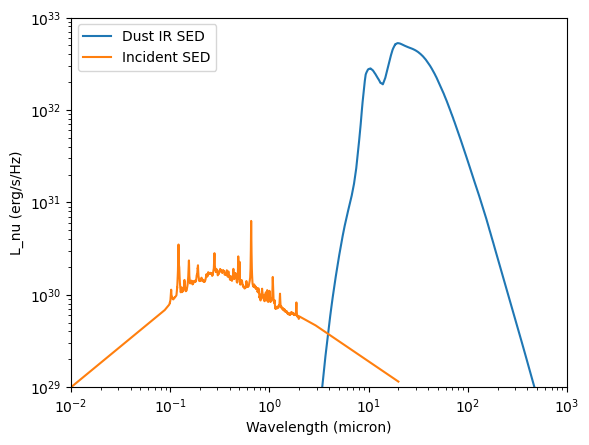

In [ ]:
plt.loglog(Rest_frame_wavelength.to(u.micron), L_nu, label='Dust IR SED')
plt.loglog(Temple_SED.wavelength.to(u.micron), Temple_SED.L_nu, label='Incident SED')
plt.xlabel('Wavelength (micron)')
plt.ylabel('L_nu (erg/s/Hz)')
plt.ylim(1e29,1e33)
plt.xlim(0.01,1e3)
plt.legend()

## Attenuated Incident SED

In [24]:
NH = 7.5e22*u.cm**-2
Attenuated_Temple = Temple_SED.L_nu*np.exp(-1*Orion_opacity.interp_ext(Temple_SED.nu)*NH)

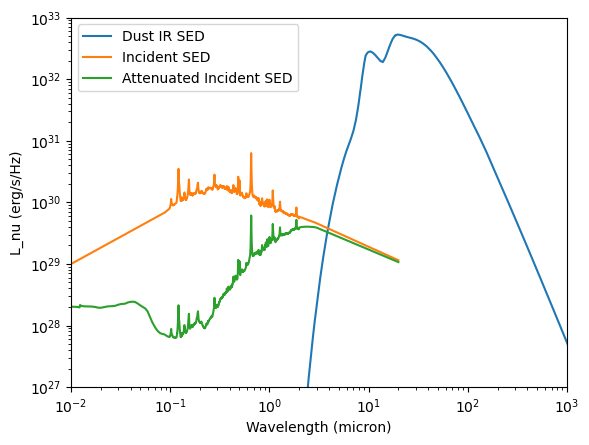

In [28]:
plt.loglog(Rest_frame_wavelength.to(u.micron), L_nu, label='Dust IR SED')
plt.loglog(Temple_SED.wavelength.to(u.micron), Temple_SED.L_nu, label='Incident SED')
plt.loglog(Temple_SED.wavelength.to(u.micron), Attenuated_Temple, label='Attenuated Incident SED')
plt.xlabel('Wavelength (micron)')
plt.ylabel('L_nu (erg/s/Hz)')
plt.ylim(1e27,1e33)
plt.xlim(0.01,1e3)
plt.legend()